In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import warnings
import pickle
warnings.filterwarnings('ignore')

In [2]:
august_tweets = pd.read_pickle("preprocessed_tweets/august_tweets.pickle")
september_tweets = pd.read_pickle("preprocessed_tweets/september_tweets.pickle")
october_tweets = pd.read_pickle("preprocessed_tweets/october_tweets.pickle")
november_tweets = pd.read_pickle("preprocessed_tweets/november_tweets.pickle")

In [3]:
tweet_dfs = [august_tweets,september_tweets,october_tweets,november_tweets]

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def display_wc(df):
    # wordlcoud for tweets
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white',  
                    min_font_size = 10).generate(str(df['text_lemm'])) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

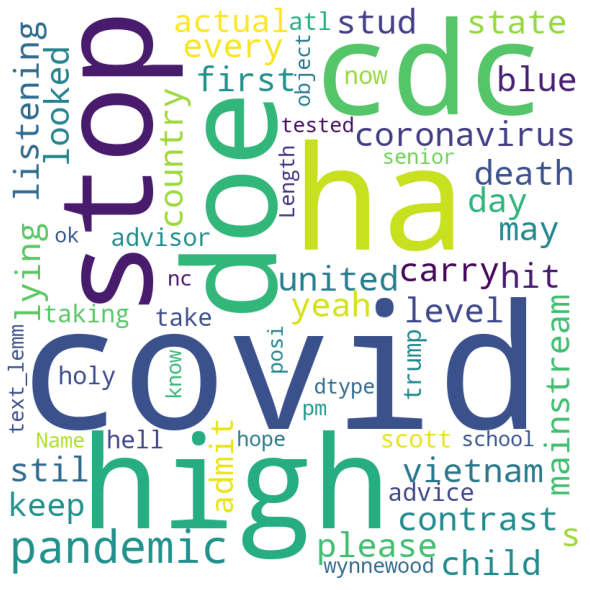

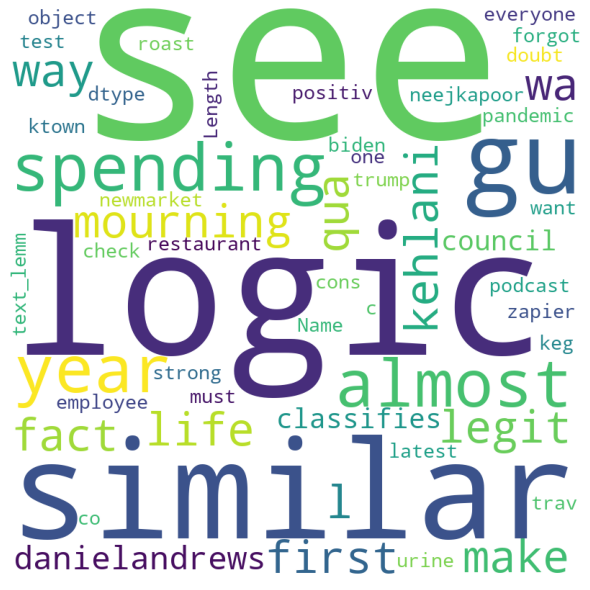

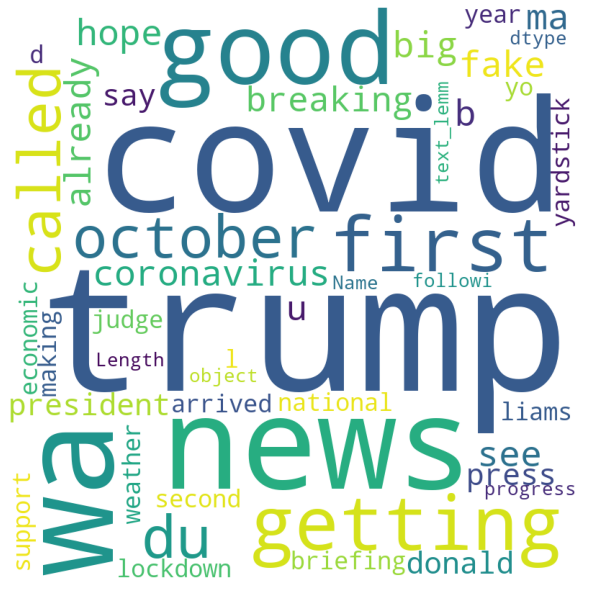

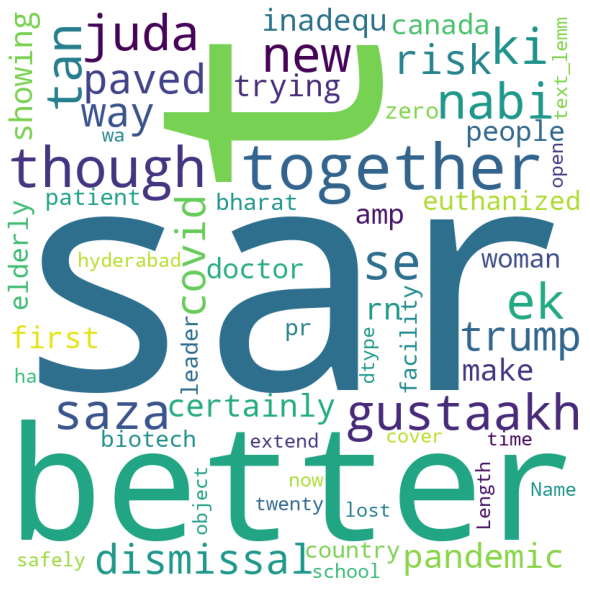

In [5]:
for df in tweet_dfs:
    display_wc(df)

In [6]:
# Importing TextBlob
from textblob import TextBlob 
# testing and training data

# apply sentiments to each dataset
for df in tweet_dfs:
    df['polarity'] = [TextBlob(tweet).sentiment.polarity for tweet in df['text_lemm']]
    df['subjectivity'] = [TextBlob(tweet).sentiment.subjectivity for tweet in df['text_lemm']]

In [7]:
for df in tweet_dfs:
    df.loc[df['polarity']<0.0,'polarity'] = -1.0
    df.loc[df['polarity']>0.0,'polarity'] = 1.0

In [9]:
final_df = pd.DataFrame()
for df in tweet_dfs:
    final_df = final_df.append(df)

In [10]:
final_df = pd.DataFrame()
for df in tweet_dfs:
    final_df = final_df.append(df)

In [11]:
final_df

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_statuses_count,user_time_zone,user_urls,user_verified,text_clean,tokenized,clean_tokens,text_lemm,polarity,subjectivity
0,NaN,Sun Aug 02 00:58:18 +0000 2020,COVID19,NaN,NaN,0,1289727190372765696,NaN,NaN,NaN,...,52513,NaN,NaN,False,contrast vietnam has covid deaths not every d...,"[contrast, vietnam, has, covid, deaths, not, e...","[contrast, vietnam, covid, deaths, every, day,...",contrast vietnam ha covid death not every day ...,0.0,0.750000
1,NaN,Sat Aug 01 04:29:53 +0000 2020,NaN,NaN,https://nyti.ms/3f9oeCp,0,1289418048886075392,NaN,NaN,NaN,...,6155,NaN,NaN,False,children may carry coronavirus at high levels ...,"[children, may, carry, coronavirus, at, high, ...","[children, may, carry, coronavirus, high, leve...",child may carry coronavirus at high level stud...,1.0,0.540000
2,NaN,Sat Aug 01 05:01:06 +0000 2020,NaN,NaN,NaN,0,1289425903236325376,LainieHinnant,1.288976e+18,4.496702e+07,...,377,NaN,NaN,False,please stop listening to the mainstream lying...,"[please, stop, listening, to, the, mainstream,...","[please, stop, listening, mainstream, lying, m...",please stop listening to the mainstream lying ...,1.0,0.540000
3,NaN,Sun Aug 02 00:50:11 +0000 2020,NaN,NaN,NaN,0,1289725146366795776,NaN,NaN,NaN,...,21571,NaN,NaN,False,the united states is the only country that st...,"[the, united, states, is, the, only, country, ...","[united, states, country, still, corona, virus...",the united state is the only country that stil...,0.0,1.000000
4,NaN,Sat Aug 01 04:37:52 +0000 2020,NaN,NaN,NaN,0,1289420056300941315,NaN,NaN,NaN,...,620,NaN,NaN,False,at first it looked like covid would hit blue ...,"[at, first, it, looked, like, covid, would, hi...","[first, looked, like, covid, would, hit, blue,...",at first it looked like covid would hit blue s...,1.0,0.177778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,NaN,Sat Nov 28 20:09:50 +0000 2020,COVID19,NaN,NaN,0,1332778751256649731,NaN,NaN,NaN,...,3387,NaN,http://truthsift.com,False,doctors in canada euthanized an elderly woman...,"[doctors, in, canada, euthanized, an, elderly,...","[doctors, canada, euthanized, elderly, woman, ...",doctor in canada euthanized an elderly woman a...,0.0,0.000000
953,NaN,Sat Nov 28 17:34:09 +0000 2020,NaN,NaN,NaN,0,1332739572237742088,TIME,1.332550e+18,1.429331e+07,...,416,NaN,https://my.w.tt/74nMWKpe3K,False,patient zero the leader of the country that p...,"[patient, zero, the, leader, of, the, country,...","[patient, zero, leader, country, prevented, co...",patient zero the leader of the country that pr...,1.0,0.500000
954,NaN,Sat Nov 28 11:48:35 +0000 2020,NaN,NaN,NaN,0,1332652605311315970,NaN,NaN,NaN,...,129764,NaN,https://twitter.com/omg_itsNeha,False,at the bharat biotech facility in hyderabad w...,"[at, the, bharat, biotech, facility, in, hyder...","[bharat, biotech, facility, hyderabad, briefed...",at the bharat biotech facility in hyderabad wa...,0.0,0.000000
955,NaN,Sun Nov 29 03:46:10 +0000 2020,NaN,NaN,NaN,0,1332893591908323328,NaN,NaN,NaN,...,25878,NaN,NaN,False,your twenties now extend to to cover time los...,"[your, twenties, now, extend, to, to, cover, t...","[twenties, extend, cover, time, lost, covid]",your twenty now extend to to cover time lost t...,0.0,0.000000


In [12]:
from sklearn.feature_extraction import stop_words
import nltk 
# nltk.download('wordnet')
# nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
# get tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
# create vectors (text features to numerical)
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(final_df['text_lemm'])

In [14]:
# explore tf-idf
np.array(vectorizer_tfidf.get_feature_names()).shape

(53304,)

In [15]:
# feature_engineering
import missingno as msno
%matplotlib inline

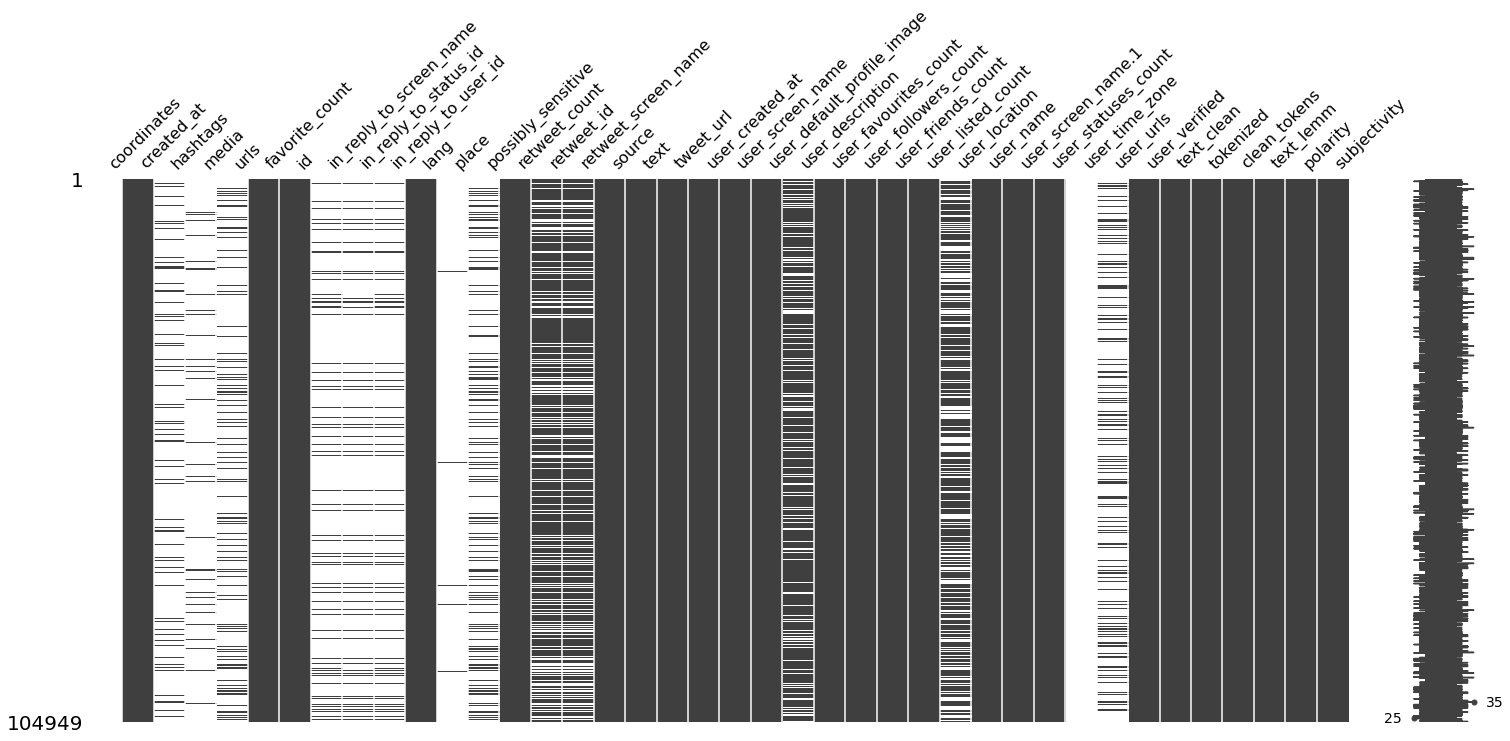

In [16]:
msno.matrix(final_df)

In [17]:
# initialize dataframe without features with missing values
new_df = final_df[["favorite_count","retweet_count","user_favourites_count","user_followers_count","user_friends_count","user_listed_count","user_verified","polarity"]]

In [18]:
new_df

,favorite_count,retweet_count,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_verified,polarity
0,0,163,171464,912,3845,0,False,0.0
1,0,0,6979,59,507,6,False,1.0
2,0,0,10786,81,255,0,False,1.0
3,0,82160,46491,518,829,1,False,0.0
4,0,6202,35085,12,163,0,False,1.0
...,...,...,...,...,...,...,...,...
952,0,879,4524,56,236,2,False,0.0
953,0,0,845,20,123,3,False,1.0
954,0,6835,172786,23280,22100,22,False,0.0
955,0,70918,10847,482,585,0,False,0.0


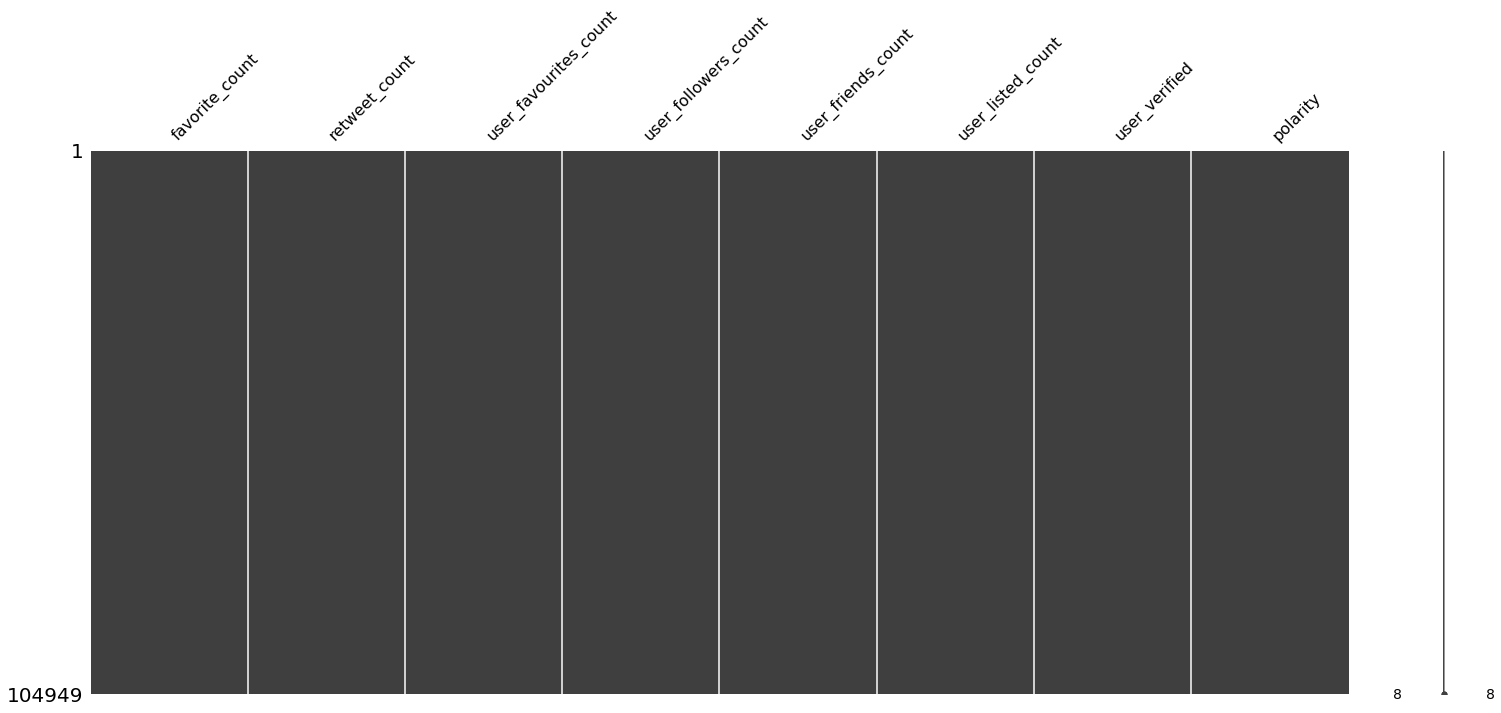

In [19]:
msno.matrix(new_df)

In [20]:
# define correlation matrix of 
corrMatrix = new_df.corr()

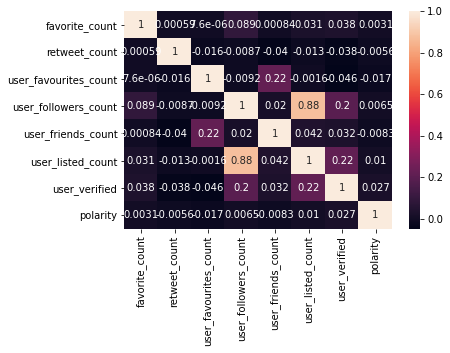

In [21]:
# plot heatmap of correlation matrix
import seaborn as sn
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [41]:
# standardize label for clustering
new_df["polarity_plus_one"] = new_df["polarity"]+1

In [22]:
# import libraries for kmeans
import sklearn
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
# scale features
from sklearn.preprocessing import scale
columns =["favorite_count","retweet_count","user_favourites_count","user_followers_count","user_friends_count","user_listed_count","user_verified"]
X = scale(new_df[columns])
y = pd.DataFrame(new_df["polarity"])
variable_names = columns

In [74]:
# fit features to clusters
clustering  = KMeans(n_clusters=3,random_state=40)
clustering.fit(X)

KMeans(n_clusters=3, random_state=40)

### Clustering based on multiple features

Text(0.5, 1.0, 'Ground Truth Classification')

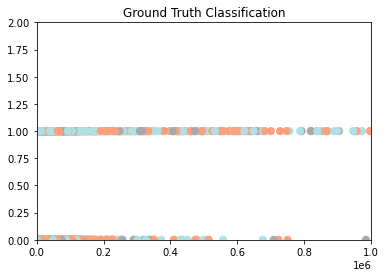

In [88]:
color_theme = np.array(['darkgray','lightsalmon','powderblue']) # define cluster colors

plt.plot
plt.scatter(x=new_df.user_followers_count,y=new_df.user_verified,c=color_theme[new_df.polarity_plus_one.astype(int)],s=50)
plt.xlim(0,1000000)
plt.ylim(0,2)

plt.title('Ground Truth Classification')

Text(0.5, 1.0, 'K-Means Classification')

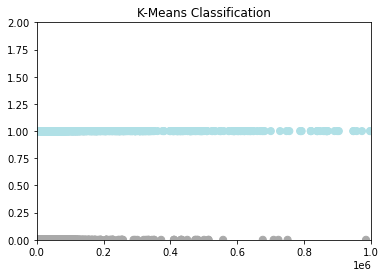

In [89]:
plt.plot
plt.scatter(x=new_df.user_followers_count,y=new_df.user_verified,c=color_theme[clustering.labels_],s=50)
plt.xlim(0,1000000)
plt.ylim(0,2)
plt.title('K-Means Classification')

Text(0.5, 1.0, 'Ground Truth Classification')

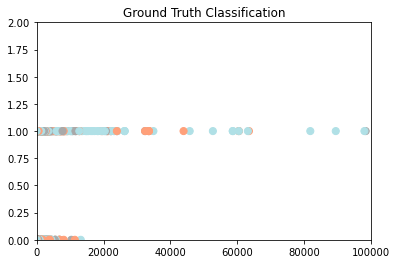

In [104]:
plt.plot
plt.scatter(x=new_df.user_listed_count,y=new_df.user_verified,c=color_theme[new_df.polarity_plus_one.astype(int)],s=50)
plt.xlim(0,100000)
plt.ylim(0,2)

plt.title('Ground Truth Classification')

Text(0.5, 1.0, 'K-Means Classification')

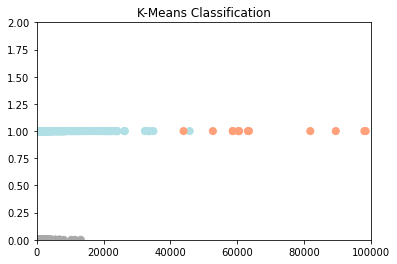

In [105]:
plt.title('Ground Truth Classification')

plt.plot
plt.scatter(x=new_df.user_listed_count,y=new_df.user_verified,c=color_theme[clustering.labels_],s=50)
plt.xlim(0,100000)
plt.ylim(0,2)
plt.title('K-Means Classification')

Text(0.5, 1.0, 'Ground Truth Classification')

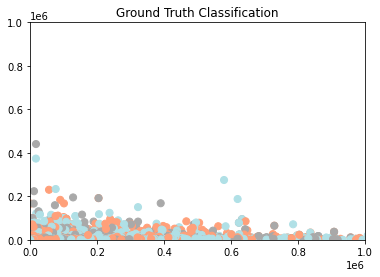

In [108]:
plt.plot
plt.scatter(x=new_df.user_favourites_count,y=new_df.user_friends_count,c=color_theme[new_df.polarity_plus_one.astype(int)],s=50)
plt.xlim(0,1000000)
plt.ylim(0,1000000)

plt.title('Ground Truth Classification')



Text(0.5, 1.0, 'K-Means Classification')

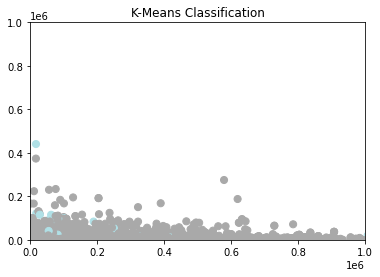

In [107]:
plt.plot
plt.scatter(x=new_df.user_favourites_count,y=new_df.user_friends_count,c=color_theme[clustering.labels_],s=50)
plt.xlim(0,1000000)
plt.ylim(0,1000000)
plt.title('K-Means Classification')

Text(0.5, 1.0, 'Ground Truth Classification')

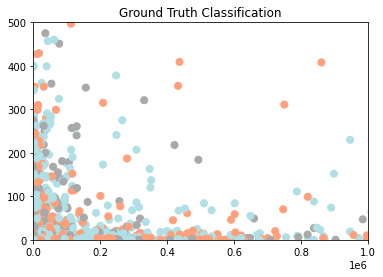

In [117]:
plt.plot
plt.scatter(x=new_df.user_followers_count,y=new_df.favorite_count,c=color_theme[new_df.polarity_plus_one.astype(int)],s=50)
plt.xlim(0,1000000)
plt.ylim(0,500)

plt.title('Ground Truth Classification')

Text(0.5, 1.0, 'K-Means Classification')

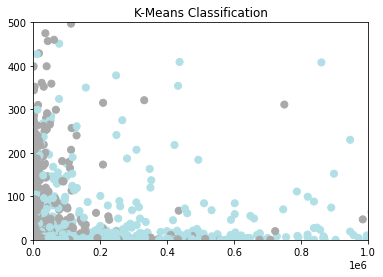

In [118]:
plt.plot
plt.scatter(x=new_df.user_followers_count,y=new_df.favorite_count,c=color_theme[clustering.labels_],s=50)
plt.xlim(0,1000000)
plt.ylim(0,500)

plt.title('K-Means Classification')

In [81]:
from sklearn.feature_extraction import stop_words
import nltk 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import decomposition

In [82]:
# create vectors (text features to numerical)
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(final_df['text_lemm'])

In [84]:
# apply topic modelling on vectors created above
import collections
clf = decomposition.NMF(n_components=10,random_state=1)
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_
vocab = np.array(vectorizer_tfidf.get_feature_names())
topics_frequency = collections.Counter(np.array(W1.argsort()[:,-1]))
topics_frequency = collections.OrderedDict(sorted(topics_frequency.items(),key= lambda kv: kv[1],reverse=True))
total_comments_count = sum(topics_frequency.values())

print('top ',10)
for k,v in topics_frequency.items():
  print('Topic {}:{}'.format(k+1, ", ".join([str(x) for x in vocab[(-H1[k]).argsort(axis=-1)[:10]]])))

top  10
Topic 1:covid, positive, test, tested, death, patient, died, amp, got, hospital
Topic 10:wa, just, quarantine, like, day, year, time, week, said, ago
Topic 4:case, new, coronavirus, death, day, reported, state, record, number, report
Topic 8:people, died, don, american, work, know, need, home, think, million
Topic 3:pandemic, middle, month, global, time, student, going, life, ve, job
Topic 5:trump, president, donald, coronavirus, biden, american, vote, say, joe, did
Topic 9:ha, positive, tested, year, coronavirus, corona, virus, world, amp, country
Topic 6:lockdown, amp, going, second, week, work, national, need, want, anti
Topic 7:vaccine, don, say, pfizer, effective, safe, want, know, trial, need
Topic 2:mask, wear, social, wearing, distancing, hand, don, wash, face, vote


In [100]:
# rough work
# covid_df = final_df[['created_at','polarity']]
# covid_df['date_split'] = [str(x).split(' ') for x in covid_df['created_at']]    
# covid_df['month'] = [x[1] for x in covid_df['date_split']]
# covid_df.groupby('month')["polarity"].mean()

month
Aug    0.198651
Nov    0.199141
Oct    0.187410
Sep    0.174185
Name: polarity, dtype: float64